In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, GRU, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Bidirectional
import seaborn as sns
import matplotlib.pyplot as plt
import gensim.downloader as api
import gensim
import numpy as np
from tensorflow import keras
import tensorflow as tf
from textblob import TextBlob
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [5]:
df = pd.read_csv('Amazon.csv')
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


<AxesSubplot:xlabel='overall', ylabel='count'>

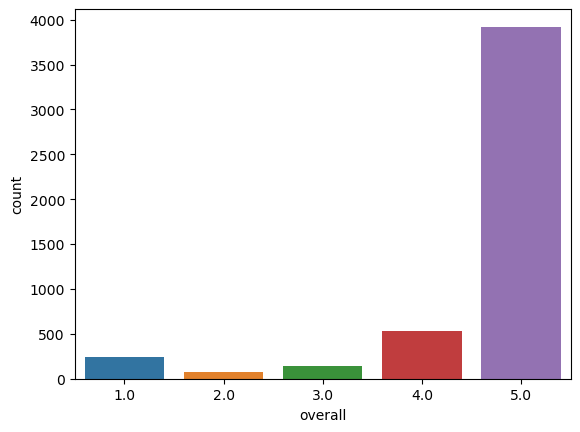

In [7]:
sns.countplot(x='overall', data=df)

Text(0, 0.5, 'Count')

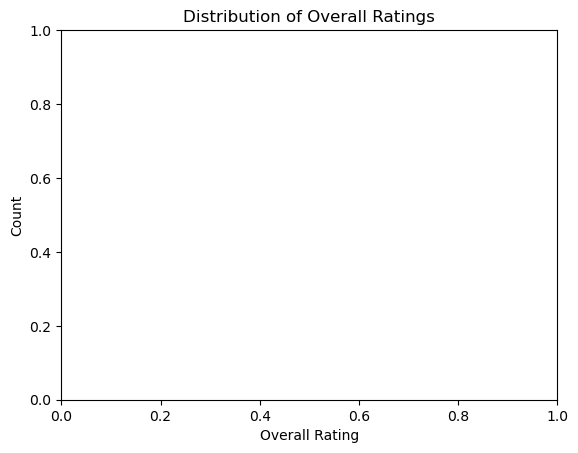

In [8]:
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')

In [9]:
plt.show()

In [10]:
X = df["reviewText"]
y = df["score_pos_neg_diff"]

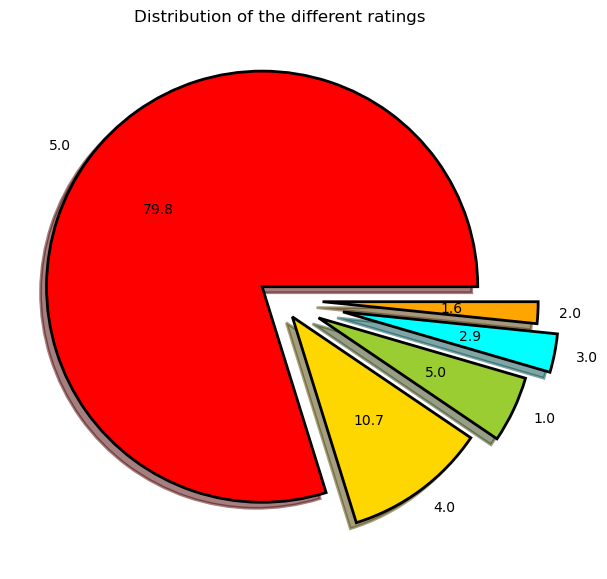

In [11]:
fig = plt.figure(figsize=(7,7))
colors = ("red","gold","yellowgreen","cyan","orange")
wp = {'linewidth':2, 'edgecolor':'black'}
tags = df['overall'].value_counts()
explode = (0.1,0.1,0.2,0.3,0.2)
tags.plot(kind='pie', autopct='%1.1f',colors=colors, shadow=True,
          startangle=0, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of the different ratings')
plt.show()

In [12]:
df.drop(['reviewerName', 'reviewTime'], axis=1, inplace=True)
df.dropna(inplace=True)

In [13]:
df['sentiment'] = df['overall'].apply(lambda x: 1 if x >= 3 else 0)
df.drop(['overall'], axis=1, inplace=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df['reviewText'], df['sentiment'], test_size=0.2, random_state=42)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df['reviewText'], df['sentiment'], test_size=0.2, random_state=42)


In [16]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


In [17]:
text_seq = tokenizer.texts_to_sequences("reviewText")
text_seq = pad_sequences(text_seq, maxlen=100)

In [18]:
X_train_padded = pad_sequences(X_train_seq, maxlen=100, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=100, padding='post', truncating='post')

In [19]:
word2vec_model = api.load('word2vec-google-news-300')

In [20]:
embedding_matrix = np.zeros((10000, 300))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model:
        embedding_vector = word2vec_model[word]
        embedding_matrix[i] = embedding_vector

In [21]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=300, weights=[embedding_matrix], input_length=100, trainable=False),
    Bidirectional(LSTM(64, dropout=0.2)),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history = model.fit(X_train_padded, y_train, batch_size=64, epochs=5, validation_data=(X_test_padded, y_test))

Epoch 1/5
62/62 [==============================] - 41s 400ms/step - loss: 0.2963 - accuracy: 0.9161 - val_loss: 0.1932 - val_accuracy: 0.9430
Epoch 2/5
62/62 [==============================] - 21s 344ms/step - loss: 0.2110 - accuracy: 0.9318 - val_loss: 0.1742 - val_accuracy: 0.9420
Epoch 3/5
62/62 [==============================] - 23s 371ms/step - loss: 0.1864 - accuracy: 0.9344 - val_loss: 0.1606 - val_accuracy: 0.9420
Epoch 4/5
62/62 [==============================] - 22s 359ms/step - loss: 0.1661 - accuracy: 0.9407 - val_loss: 0.1348 - val_accuracy: 0.9451
Epoch 5/5
62/62 [==============================] - 24s 390ms/step - loss: 0.1349 - accuracy: 0.9479 - val_loss: 0.1196 - val_accuracy: 0.9502


In [23]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

31/31 [==============================] - 3s 82ms/step - loss: 0.1196 - accuracy: 0.9502
Test loss: 0.11956044286489487
Test accuracy: 0.950152575969696


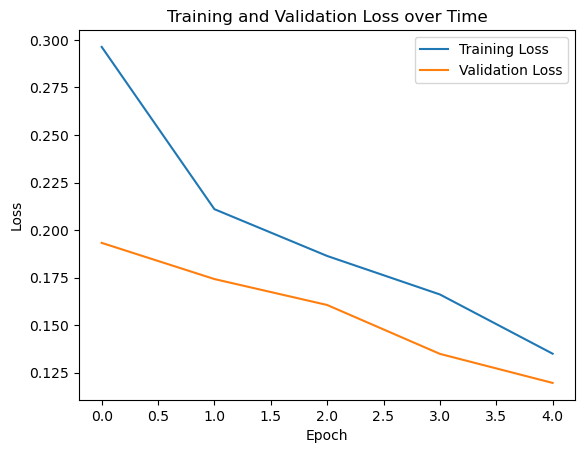

In [24]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


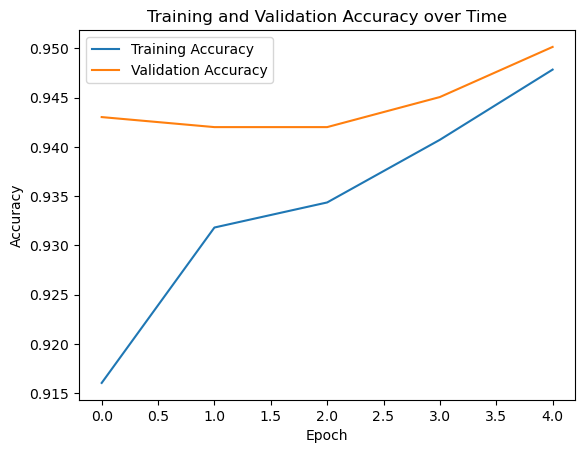

In [25]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
model_cnn = Sequential([
    Embedding(input_dim=10000, output_dim=300, weights=[embedding_matrix], input_length=100, trainable=False),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D()
    ])

In [27]:
model_cnn = Sequential([
    Embedding(input_dim=10000, output_dim=300, weights=[embedding_matrix], input_length=100, trainable=False),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [28]:
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
history_cnn = model_cnn.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_data=(X_test_padded, y_test))

Epoch 1/10
62/62 [==============================] - 19s 157ms/step - loss: 0.2558 - accuracy: 0.9214 - val_loss: 0.1761 - val_accuracy: 0.9430
Epoch 2/10
62/62 [==============================] - 7s 110ms/step - loss: 0.1855 - accuracy: 0.9318 - val_loss: 0.1571 - val_accuracy: 0.9430
Epoch 3/10
62/62 [==============================] - 6s 96ms/step - loss: 0.1543 - accuracy: 0.9318 - val_loss: 0.1451 - val_accuracy: 0.9430
Epoch 4/10
62/62 [==============================] - 6s 98ms/step - loss: 0.1269 - accuracy: 0.9384 - val_loss: 0.1385 - val_accuracy: 0.9451
Epoch 5/10
62/62 [==============================] - 6s 95ms/step - loss: 0.1008 - accuracy: 0.9527 - val_loss: 0.1528 - val_accuracy: 0.9430
Epoch 6/10
62/62 [==============================] - 5s 86ms/step - loss: 0.0718 - accuracy: 0.9626 - val_loss: 0.1563 - val_accuracy: 0.9481
Epoch 7/10
62/62 [==============================] - 6s 104ms/step - loss: 0.0501 - accuracy: 0.9753 - val_loss: 0.1477 - val_accuracy: 0.9491
Epoch 8/1

In [30]:
loss, accuracy = model_cnn.evaluate(X_test_padded, y_test)
print("CNN Model - Loss: {:.2f}, Accuracy: {:.2f}%".format(loss, accuracy * 100))

31/31 [==============================] - 1s 19ms/step - loss: 0.1701 - accuracy: 0.9502
CNN Model - Loss: 0.17, Accuracy: 95.02%


In [31]:
model_gru = Sequential([
    Embedding(input_dim=10000, output_dim=300, weights=[embedding_matrix], input_length=100, trainable=False),
    GRU(64, dropout=0.2),
    Dense(1, activation='sigmoid')
])

In [32]:
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
history_gru = model_gru.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_data=(X_test_padded, y_test))

Epoch 1/10
62/62 [==============================] - 65s 306ms/step - loss: 0.3605 - accuracy: 0.9171 - val_loss: 0.2005 - val_accuracy: 0.9430
Epoch 2/10
62/62 [==============================] - 14s 231ms/step - loss: 0.2192 - accuracy: 0.9341 - val_loss: 0.1983 - val_accuracy: 0.9420
Epoch 3/10
62/62 [==============================] - 13s 216ms/step - loss: 0.2083 - accuracy: 0.9336 - val_loss: 0.1934 - val_accuracy: 0.9410
Epoch 4/10
62/62 [==============================] - 14s 230ms/step - loss: 0.1921 - accuracy: 0.9369 - val_loss: 0.1836 - val_accuracy: 0.9349
Epoch 5/10
62/62 [==============================] - 14s 218ms/step - loss: 0.1885 - accuracy: 0.9412 - val_loss: 0.1813 - val_accuracy: 0.9430
Epoch 6/10
62/62 [==============================] - 14s 224ms/step - loss: 0.1867 - accuracy: 0.9395 - val_loss: 0.1655 - val_accuracy: 0.9420
Epoch 7/10
62/62 [==============================] - 15s 246ms/step - loss: 0.1594 - accuracy: 0.9425 - val_loss: 0.1666 - val_accuracy: 0.9369

In [34]:
loss, accuracy = model_gru.evaluate(X_test_padded, y_test)
print("GRU Model - Loss: {:.2f}, Accuracy: {:.2f}%".format(loss, accuracy * 100))

31/31 [==============================] - 2s 63ms/step - loss: 0.1407 - accuracy: 0.9430
GRU Model - Loss: 0.14, Accuracy: 94.30%


In [35]:
model_lstm = Sequential([
    Embedding(input_dim=10000, output_dim=300, weights=[embedding_matrix], input_length=100, trainable=False),
    LSTM(64, dropout=0.2),
    Dense(1, activation='sigmoid')
])

In [36]:
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
history_lstm = model_lstm.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_data=(X_test_padded, y_test))

Epoch 1/10
62/62 [==============================] - 47s 389ms/step - loss: 0.3268 - accuracy: 0.9234 - val_loss: 0.2062 - val_accuracy: 0.9430
Epoch 2/10
62/62 [==============================] - 20s 330ms/step - loss: 0.2264 - accuracy: 0.9339 - val_loss: 0.2067 - val_accuracy: 0.9400
Epoch 3/10
62/62 [==============================] - 20s 322ms/step - loss: 0.2135 - accuracy: 0.9336 - val_loss: 0.2116 - val_accuracy: 0.8973
Epoch 4/10
62/62 [==============================] - 21s 339ms/step - loss: 0.2306 - accuracy: 0.9306 - val_loss: 0.2035 - val_accuracy: 0.9430
Epoch 5/10
62/62 [==============================] - 22s 351ms/step - loss: 0.2152 - accuracy: 0.9321 - val_loss: 0.1933 - val_accuracy: 0.9420
Epoch 6/10
62/62 [==============================] - 33s 532ms/step - loss: 0.2055 - accuracy: 0.9334 - val_loss: 0.1721 - val_accuracy: 0.9410
Epoch 7/10
62/62 [==============================] - 25s 404ms/step - loss: 0.2413 - accuracy: 0.9318 - val_loss: 0.2007 - val_accuracy: 0.9410

In [38]:
loss, accuracy = model_lstm.evaluate(X_test_padded, y_test)
print("LSTM Model - Loss: {:.2f}, Accuracy: {:.2f}%".format(loss, accuracy * 100))

31/31 [==============================] - 2s 63ms/step - loss: 0.1970 - accuracy: 0.9217
LSTM Model - Loss: 0.20, Accuracy: 92.17%


In [63]:
# assuming your model object is named `model`
model_gru.save('model_gru.h5')

In [64]:
model_cnn.save('model_cnn.h5')

In [65]:
model_lstm.save('model_lstm.h5')

In [66]:
model = load_model('model_cnn.h5')

In [67]:
model = load_model('model_gru.h5')

In [68]:
model = load_model('model_lstm.h5')

In [69]:
def analyze_sentiment(text):
    # Load the saved model
    model = load_model('model_gru.h5')
    
    # Tokenize the input text
    max_features = 1000 # define the maximum number of words to keep in the vocabulary
    maxlen = 100 # define the maximum number of words to keep in the vocabulary

    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts([text])
    text_seq = tokenizer.texts_to_sequences([text])
    text_seq = pad_sequences(text_seq, maxlen=maxlen)
    
    # Predict the sentiment of the input text
    predicted_prob = model.predict(text_seq)[0][0]
    predicted_class = 1 if predicted_prob > 0.5 else 0
    
    # Return the predicted sentiment
    if predicted_class < 0.5:
        return "Negative"
    else:
        return "Positive"

# Get user input
text = input("Enter some text to analyze: ")

# Analyze the sentiment of the input text
sentiment = analyze_sentiment(text)

# Print the predicted sentiment
print("The predicted sentiment of the text is:", sentiment)


Enter some text to analyze: it sucked
1/1 [==============================] - 3s 3s/step
The predicted sentiment of the text is: Positive


In [70]:
def analyze_sentiment(text):
    # Load the saved model
    model = load_model('model_cnn.h5')
    
    # Tokenize the input text
    max_features = 1000 # define the maximum number of words to keep in the vocabulary
    maxlen = 100 # define the maximum number of words to keep in the vocabulary

    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts([text])
    text_seq = tokenizer.texts_to_sequences([text])
    text_seq = pad_sequences(text_seq, maxlen=maxlen)
    
    # Predict the sentiment of the input text
    predicted_prob = model.predict(text_seq)[0][0]
    predicted_class = 1 if predicted_prob > 0.5 else 0
    
    # Return the predicted sentiment
    if predicted_class < 0.5:
        return "Negative"
    else:
        return "Positive"

# Get user input
text = input("Enter some text to analyze: ")

# Analyze the sentiment of the input text
sentiment = analyze_sentiment(text)

# Print the predicted sentiment
print("The predicted sentiment of the text is:", sentiment)


Enter some text to analyze: it sucked
1/1 [==============================] - 1s 610ms/step
The predicted sentiment of the text is: Positive


In [73]:
def analyze_sentiment(text):
    # Load the saved model
    model = load_model('model_lstm.h5')
    
    # Tokenize the input text
    max_features = 1000 # define the maximum number of words to keep in the vocabulary
    maxlen = 100 # define the maximum number of words to keep in the vocabulary

    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts([text])
    text_seq = tokenizer.texts_to_sequences([text])
    text_seq = pad_sequences(text_seq, maxlen=maxlen)
    
    # Predict the sentiment of the input text
    predicted_prob = model.predict(text_seq)[0][0]
    
    # Return the predicted sentiment
    if predicted_prob > 0.5:
        return "Positive"
    else:
        return "Negative"

# Get user input
text = input("Enter some text to analyze: ")

# Analyze the sentiment of the input text
sentiment = analyze_sentiment(text)

# Print the predicted sentiment
print("The predicted sentiment of the text is:", sentiment)


Enter some text to analyze: honestly i hated it
1/1 [==============================] - 2s 2s/step
The predicted sentiment of the text is: Positive
